In [1]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#Reading the data
df = pd.read_csv('data/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)

In [4]:
df.shape

(4920, 7)

In [5]:
#Finding number of null values in each column
df.isna().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
dtype: int64

In [6]:
# Percentage of Missing Values
(df.isnull().sum()/df.shape[0])*100

Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
dtype: float64

In [7]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6'],
      dtype='object')

In [8]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390


In [9]:
#Remove Hyphen
for col in df.columns:
    df[col]= df[col].str.replace('_',' ')

In [10]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN


In [11]:
df.fillna(0,inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0


In [12]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
dtype: int64

In [13]:
df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [14]:
df_s = pd.read_csv('data/Symptom-severity.csv')
df_s.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [15]:
# Replacing Hyphen with space from the data
df_s['Symptom']=df_s['Symptom'].str.replace('_',' ')

In [16]:
df_s['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [17]:
a= np.array(df_s['weight'])
a

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5], dtype=int64)

In [58]:
vals = df.values
symptoms = df_s['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_s[df_s['Symptom'] == symptoms[i]]['weight'].values[0]
    
newdf = pd.DataFrame(vals, columns=cols)
newdf.head()

array([['Fungal infection', 1, 3, ..., 'dischromic  patches', 0, 0],
       ['Fungal infection', 3, 4, ..., 0, 0, 0],
       ['Fungal infection', 1, 4, ..., 0, 0, 0],
       ...,
       ['Urinary tract infection', 6, 4, ..., 6, 0, 0],
       ['Psoriasis', 3, 3, ..., 2, 2, 2],
       ['Impetigo', 3, 7, ..., 2, 3, 0]], dtype=object)

In [19]:
newdf = newdf.replace('dischromic  patches', 0)
newdf = newdf.replace('spotting  urination',0)
newdf = newdf.replace('foul smell of urine',0)
newdf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,1,3,4,0,0,0
1,Fungal infection,3,4,0,0,0,0
2,Fungal infection,1,4,0,0,0,0
3,Fungal infection,1,3,0,0,0,0
4,Fungal infection,1,3,4,0,0,0
5,Fungal infection,3,4,0,0,0,0
6,Fungal infection,1,4,0,0,0,0
7,Fungal infection,1,3,0,0,0,0
8,Fungal infection,1,3,4,0,0,0
9,Fungal infection,1,3,4,0,0,0


Training

In [20]:
X = newdf.drop(['Disease'],axis=1)
y = newdf['Disease']

In [21]:
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,1,3,4,0,0,0
1,3,4,0,0,0,0
2,1,4,0,0,0,0
3,1,3,0,0,0,0
4,1,3,4,0,0,0


In [22]:
y.sample(6)

1417                 Typhoid
1130          Hypothyroidism
1286     Peptic ulcer diseae
3940           Drug Reaction
2800    Cervical spondylosis
1075            Tuberculosis
Name: Disease, dtype: object

Splitting the data

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3)

Logistic Regression

In [44]:
clf_lr= LogisticRegression(fit_intercept=True)

In [45]:
clf_lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
predict = clf_lr.predict(X_test)

In [47]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 84.31%


In [48]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.93      0.93      0.93        29
                                   AIDS       0.82      0.88      0.85        26
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       0.93      0.93      0.93        30
                                Allergy       0.67      0.80      0.73        30
                              Arthritis       0.86      0.96      0.91        25
                       Bronchial Asthma       0.86      0.69      0.77        36
                   Cervical spondylosis       0.76      0.63      0.69        30
                            Chicken pox       0.90      0.93      0.92        29
                    Chronic cholestasis       0.85      0.88      0.87        33
                            Common Cold       0.73      0.79      0.76        28
                           

<AxesSubplot:>

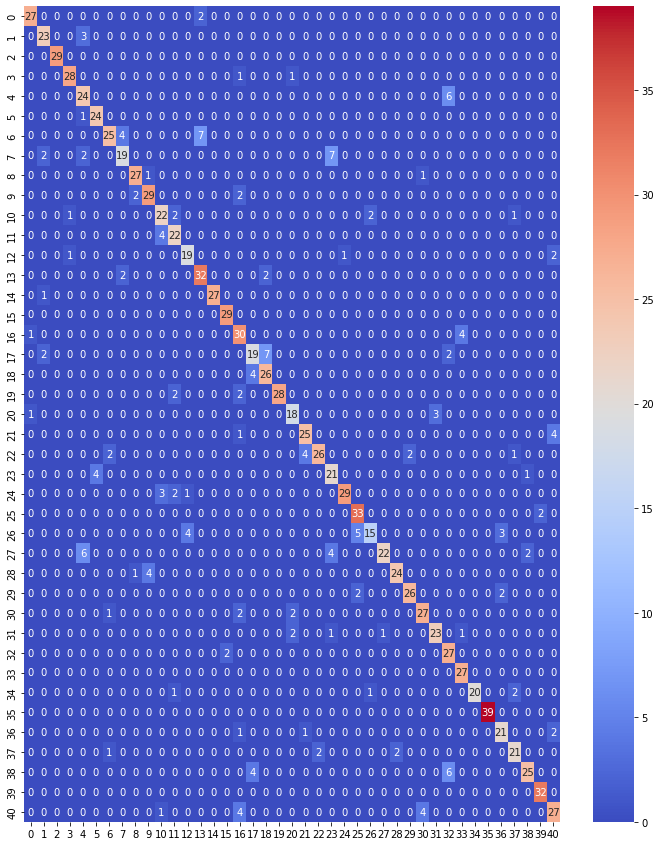

In [49]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf_rfc = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
clf_rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s


building tree 1 of 700building tree 2 of 700

building tree 3 of 700
building tree 4 of 700building tree 5 of 700

building tree 6 of 700building tree 7 of 700
building tree 8 of 700

building tree 9 of 700
building tree 10 of 700
building tree 11 of 700building tree 12 of 700

building tree 13 of 700
building tree 14 of 700building tree 15 of 700

building tree 16 of 700
building tree 17 of 700
building tree 18 of 700building tree 19 of 700building tree 20 of 700

building tree 21 of 700

building tree 22 of 700building tree 23 of 700

building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700building tree 28 of 700building tree 29 of 700building tree 30 of 700



building tree 31 of 700
building tree 32 of 700
building tree 33 of 700
building tree 34 of 700building tree 35 of 700

building tree 36 of 700building tree 37 of 700
building tree 38 of 700building tree 39 of 700building tree 40 of 700



building tree 41 of 700
building tree 42 of 700bu

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.3s



building tree 219 of 700
building tree 220 of 700building tree 221 of 700

building tree 222 of 700
building tree 223 of 700
building tree 224 of 700
building tree 225 of 700
building tree 226 of 700building tree 227 of 700

building tree 228 of 700
building tree 229 of 700
building tree 230 of 700building tree 231 of 700

building tree 232 of 700
building tree 233 of 700
building tree 234 of 700
building tree 235 of 700
building tree 236 of 700
building tree 237 of 700building tree 238 of 700building tree 239 of 700


building tree 240 of 700
building tree 241 of 700
building tree 242 of 700
building tree 243 of 700
building tree 244 of 700building tree 245 of 700building tree 246 of 700building tree 247 of 700



building tree 248 of 700
building tree 249 of 700
building tree 250 of 700
building tree 251 of 700
building tree 252 of 700
building tree 253 of 700building tree 254 of 700building tree 255 of 700building tree 256 of 700



building tree 257 of 700
building tree 258 of 700

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.5s


building tree 456 of 700
building tree 457 of 700
building tree 458 of 700
building tree 459 of 700
building tree 460 of 700
building tree 461 of 700building tree 462 of 700
building tree 463 of 700

building tree 464 of 700
building tree 465 of 700
building tree 466 of 700building tree 467 of 700
building tree 468 of 700

building tree 469 of 700building tree 470 of 700

building tree 471 of 700
building tree 472 of 700
building tree 473 of 700
building tree 474 of 700building tree 475 of 700
building tree 476 of 700
building tree 477 of 700

building tree 478 of 700
building tree 479 of 700building tree 480 of 700

building tree 481 of 700
building tree 482 of 700
building tree 483 of 700
building tree 484 of 700
building tree 485 of 700
building tree 486 of 700building tree 487 of 700

building tree 488 of 700
building tree 489 of 700
building tree 490 of 700
building tree 491 of 700
building tree 492 of 700building tree 493 of 700

building tree 494 of 700
building tree 495 of 700


[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    1.1s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [52]:
predict = clf_rfc.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished


In [53]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 98.21%


In [54]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        29
                                   AIDS       1.00      1.00      1.00        26
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       0.91      1.00      0.95        30
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      0.90      0.95        30
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        33
                            Common Cold       1.00      0.96      0.98        28
                           

<AxesSubplot:>

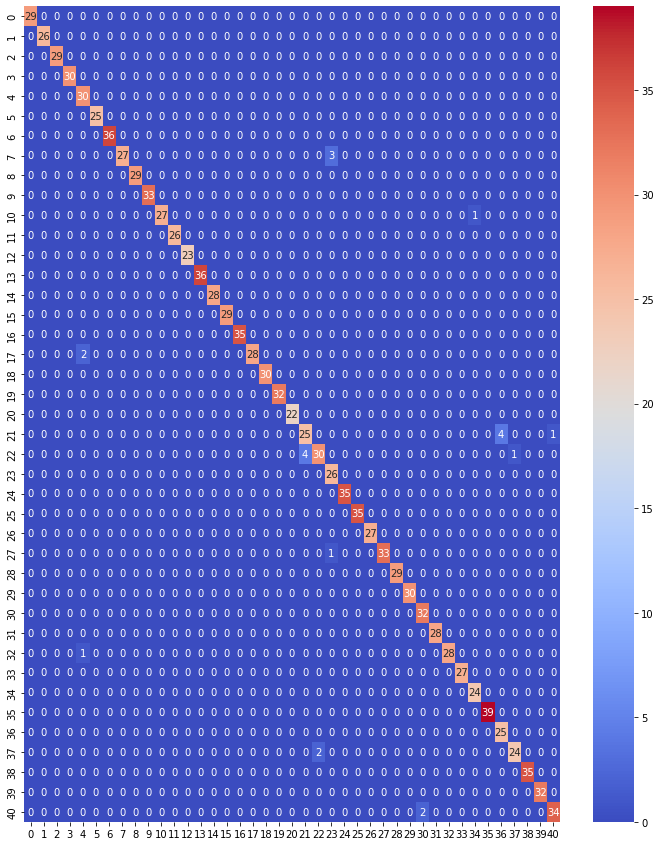

In [55]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

In [56]:
#Prediction function
def predict(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting'):
    l = [s1,s2,s3,s4,s5,s6]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = clf_rfc.predict(res)
    print(pred[0])

In [57]:
predict('chills' ,'skin rash', 'nodal skin eruptions')

['chills', 'skin rash', 'nodal skin eruptions', 'vomiting', 'vomiting', 'vomiting']
hepatitis A


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.0s finished


Precautions

In [61]:
df_prec = pd.read_csv('data/symptom_precaution.csv')
df_prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,consult doctor,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [62]:
df_prec.isna().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

In [89]:
def precaution(d):
    df_new_prec = df_prec.loc[df_prec['Disease'] == d]
    return df_new_prec.iat[0,1], df_new_prec.iat[0,2], df_new_prec.iat[0,3], df_new_prec.iat[0,4]

In [90]:
tup = precaution('Malaria')
tup

('Consult nearest hospital',
 'avoid oily food',
 'avoid non veg food',
 'keep mosquitos out')

In [92]:
df_new_prec = df_prec.loc[df_prec['Disease'] == "Chicken pox"]
df_new_prec.iat[0,1]

'use neem in bathing '